<img style="float:right;" src="https://www.tudublin.ie/media/website/site-assets/images/tu-dublin-logo-blue.svg">

_by  <a href="mailto:X00193937@mytudublin.ie">Jorge Jimenez Garcia</a>_ : X00193937

# Table of contents:

* [Introduction](#p1)
    * [Motivation](#p1.1)
    * [Dataset overview](#p1.2)
    * [Imports and tools used](#p1.3)
    * [Data Quality](#p1.4)
* [Exploratory Data Analysis](#p2)
    * [Preliminary Transformations](#pt2.1)
    * [The members of the Dataset](#pt2.2)
    * [Stats per city zones](#pt2.3)

# Introduction
<a name='p1'></a>

## Motivation
<a name='p1.1'></a>

In light of the recent climate crisis, alternative and sustainable modes of transportation rise as a valuable option to lower a city's carbon footprint. Additionally, there have been recent discussions on the walkability and accessibility of cities in relation to their quality of life. With so many important topics related to transportation in the spotlight, I thought it would be fit to examine datasets regarding it.

To this end, we will study New York City's Citywide Mobility Survey, or CMS for short. NYC was picked for generally being understood to be a transport friendly city, and being a big city, it allows the city to collect a wide variety of diverse information about its citizens.

[The New York CMS](https://data.cityofnewyork.us/browse?q=Citywide%20Mobility%20Survey&sortBy=relevance) is a yearly survey on the city's population to assess the citizen's view of transport, their usage and other demographic data about public and private transport users and is conducted by the Department of Transportation. This survey is comprised of several different dataset that contain information about the respondent, their household, each individual trip they made or their vehicles.

In this project, we will study the [Person data from the 2019 version of the report](https://data.cityofnewyork.us/Transportation/Citywide-Mobility-Survey-Person-Survey-2019/6bqn-qdwq). 

## Dataset
<a name='p1.2'></a>

The CMS survey is a statistically valid sample of nearly 3000 residents of NYC across the 10 designed geographic survey zones, with approximately 300 respondents per zone. It also contains incomplete information about the member in the respondent's household. (3346 respondents, 8286 person entries) 

The survey contains a variety of attributes regarding the survey's result, as well as general information about the survey's respondents. With a total of 165 attributes, we will not make use of all of them, but some that might be of use are as follow:

* __cms\_zone__: Categorical; The area where the respondent lives, from a set of predefined areas by the Department of Transportation (Inner Brooklyn, Middle Queens, Outer Queens, Manhattan Core, Northern Bronx, Northern Manhattan, Outer Brooklyn, Staten Island, Inner Queens, Southern Bronx)
* __num\_trips__: Discrete; The number of trips a person made for the survey's duration
* __num_walk_trips__: Discrete; The number of trips done on foot
* __num_transit_trips__: Discrete; The number of trips made using public transport
* __num_bike_trips__: Discrete; The number of trips made by bike
* __num_taxi_trips__: Discrete; The number of trips made by taxi
* __num_tnc_trips__: Discrete; The number of trips made using a vehicle-for-hire service (eg. Uber, Lyft, etc.)
* __age__: Categorical; The age of the respondent, in ranges (Under 5, 5 to 15, 16 to 17, 18 to 24, 25 to 34, etc.)
* __employment__: Categorical; Type of employment (Full-time, Part-time, Self-employed, Not employed, Unpaid Volunteer or Intern)
* __student__: Categorical; If the respondent is currently a student and of what type (Not a student, Full-time, Part-time)
* __industry__: Categorical; Work industry (Financial Services, Real Estate, Capital Goods, Business Services, etc.)
* __work_cms_zone__: Categorical; The area where the respondent works (Inner Brooklyn, Middle Queens, Outer Queens, Manhattan Core, Northern Bronx, Northern Manhattan, Outer Brooklyn, Staten Island, Inner Queens, Southern Bronx)
* __work\_mode__: Typical mode of transportation to work (Walk, Other, Household Vehicle, Rental/Carshare/Work Vehicle, Bus, Ferry, Rail, Taxi or TNC, Scooter)

[_This information is sourced from the CMS's Data Dictionary_](https://data.cityofnewyork.us/api/views/6bqn-qdwq/files/038d8557-22ba-4268-b323-d03ea3c82a88?download=true&filename=Open%20Data%20Dictionary_CMS%20%20Person%20Survey%202019.xlsx)

In [1]:
import pandas as pd

attributes = ['num_days','cms_zone', 'num_trips', 'num_walk_trips', 'num_transit_trips', 'num_bike_trips', 
              'num_taxi_trips', 'num_tnc_trips','age','gender','employment','student','industry',
              'work_cms_zone','work_mode']

df = pd.read_csv('Citywide_Mobility_Survey_-_Person_Survey_2019.csv')[attributes]
print(df.shape[0])
df.head(10)

8286


,num_days,cms_zone,num_trips,num_walk_trips,num_transit_trips,num_bike_trips,num_taxi_trips,num_tnc_trips,age,gender,employment,student,industry,work_cms_zone,work_mode
0,NaN,Inner Brooklyn,NaN,NaN,NaN,NaN,NaN,NaN,9,995,3,0,995,NaN,995
1,NaN,Inner Brooklyn,NaN,NaN,NaN,NaN,NaN,NaN,8,995,6,0,995,NaN,995
2,7.0,Inner Brooklyn,23.0,1.0,3.0,11.0,0.0,0.0,5,1,6,1,995,NaN,995
3,NaN,Middle Queens,NaN,NaN,NaN,NaN,NaN,NaN,8,995,1,0,995,NaN,995
4,NaN,Middle Queens,NaN,NaN,NaN,NaN,NaN,NaN,7,995,6,0,995,NaN,995
5,7.0,Middle Queens,15.0,2.0,1.0,0.0,0.0,0.0,5,2,2,2,8,NaN,100
6,7.0,Middle Queens,30.0,22.0,9.0,0.0,0.0,0.0,7,1,7,0,15,NaN,105
7,NaN,Middle Queens,NaN,NaN,NaN,NaN,NaN,NaN,5,995,2,0,995,NaN,995
8,NaN,Middle Queens,NaN,NaN,NaN,NaN,NaN,NaN,9,995,3,0,995,NaN,995
9,NaN,Middle Queens,NaN,NaN,NaN,NaN,NaN,NaN,5,995,6,0,995,NaN,995


## Imports
<a name='p1.3'></a>

For analysis, we will use the standard data analysis Python toolkit 

In [2]:
# Pandas already was imported to show an overview of the dataset
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pingouin
from scipy import stats

## Data Quality
<a name='p1.4'></a>

As previously mentioned, the survey dataset contains both respondents and their household's members. Since this survey is on a person-by-person basis, there is no information to be gained from their household members, who additionally did not answer said survey and therefore have missing data on almost all of the attributes we are interested in. We can easily identify household members using this fact, and they will be removed from the dataset, since they were only included as part of the bigger CMS dataset.

Some other attributes will be reworked to have clearer data, for instance the number of trips by car is understood to be `num_trips`, since it seems the attribute does not represent the total, but the codebook does not specify the mode of transportation used, and no other mode remains. 

In [3]:
df.rename(columns = { 'num_trips': 'num_car_trips' }, inplace=True )

### Missing Data

In [4]:
df.isna().sum()

num_days             4940
cms_zone                0
num_car_trips        4940
num_walk_trips       4940
num_transit_trips    4940
num_bike_trips       4940
num_taxi_trips       4940
num_tnc_trips        4940
age                     0
gender                  0
employment              0
student                 0
industry                0
work_cms_zone        6599
work_mode               0
dtype: int64

As we can see from the missing data analysis, there are 4940 instances of the `num_trips` attributes that are identified as missing or incomplete. These are actually the household members of the actual survey respondent. This matches up with the information reported in the codebook and previously mentioned, where it is stated that the dataset contains 3346 survey respondents (Total of 8286 instances, 4940 were 'missing' or 'non aplicable' instances so the 3346 respondents remain)

This leaves the missing values in `work_cms_zone` to address. These probably correspond to unemployed survey respondents, or those who do not work in the city. This means we have to avoid dropping the NaN instances in `work_cms_zone`, since it could be important to discern between, for example, workers who work inside the city and those that do not.

In [5]:
miss = ['num_car_trips', 'num_walk_trips', 'num_transit_trips', 'num_bike_trips', 'num_taxi_trips', 'num_tnc_trips']
df[miss] = df[miss].mask( df[miss].isna(), np.nan)
df.dropna(subset=miss,inplace=True)
df.reset_index(drop=True, inplace=True)

We double check that we did not drop the NaN instances in `work_cms_zone`

In [6]:
assert df.isna().sum()['work_cms_zone'] > 0

To obtain proper standardized metrics across survey subjects and to ensure participants who have given us data for longer skew the values, we divide all of these metrics by the number of days a respondent has participated in the survey, contained in the `num_days` column

In [7]:
cols = ['num_car_trips', 'num_walk_trips', 'num_transit_trips', 'num_bike_trips', 'num_taxi_trips', 'num_tnc_trips']
n_days = df['num_days']

for c in cols:
    df[ c ] = df[ c ] / n_days


    
df.rename(columns = { 
    'num_car_trips' : 'mean_num_car_trips_per_day',
    'num_walk_trips': 'mean_num_walk_trips_per_day',
    'num_transit_trips': 'mean_num_transit_trips_per_day',
    'num_bike_trips': 'mean_num_bike_trips_per_day',
    'num_taxi_trips': 'mean_num_taxi_trips_per_day',
    'num_tnc_trips': 'mean_num_tnc_trips_per_day'
}, inplace=True )

df

,num_days,cms_zone,mean_num_car_trips_per_day,mean_num_walk_trips_per_day,mean_num_transit_trips_per_day,mean_num_bike_trips_per_day,mean_num_taxi_trips_per_day,mean_num_tnc_trips_per_day,age,gender,employment,student,industry,work_cms_zone,work_mode
0,7.0,Inner Brooklyn,3.285714,0.142857,0.428571,1.571429,0.0,0.000000,5,1,6,1,995,NaN,995
1,7.0,Middle Queens,2.142857,0.285714,0.142857,0.000000,0.0,0.000000,5,2,2,2,8,NaN,100
2,7.0,Middle Queens,4.285714,3.142857,1.285714,0.000000,0.0,0.000000,7,1,7,0,15,NaN,105
3,7.0,Middle Queens,6.857143,3.285714,1.857143,0.000000,0.0,0.000000,6,2,1,0,16,Manhattan Core,105
4,7.0,Middle Queens,6.428571,1.857143,0.857143,1.714286,0.0,0.285714,5,1,1,2,13,Inner Queens,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3341,1.0,Staten Island,2.000000,0.000000,2.000000,0.000000,0.0,0.000000,6,1,1,0,15,NaN,995
3342,1.0,Staten Island,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,8,2,3,0,12,NaN,100
3343,1.0,Staten Island,3.000000,0.000000,0.000000,0.000000,0.0,0.000000,7,2,1,0,1,Manhattan Core,102
3344,1.0,Staten Island,4.000000,0.000000,2.000000,0.000000,0.0,1.000000,4,2,1,0,7,Outer Brooklyn,105


## Exploratory Data Analysis
<a name='pt2'></a>


We look now at histogram views of a subset of trips per day using certain modes of transportation, which will help guide the hypothesis we want to test as well as gaining an understanding of the people who comprise our dataset.

### Preliminary Transformations
<a name='pt2.1'></a>

We also will transform some of the values that denote a categorical value such as gender or a range like for age into text, to have clearer tables and visualizations. The values for each were taken from the dataset's codebook

In [8]:
df.sort_values(by='age', inplace=True)

def transform_age(x):
    if x == 1:
        return 'Under 5'
    elif x == 2:
        return '5-15'
    elif x == 3:
        return '16-17'
    elif x == 4:
        return '18-24'
    elif x == 5:
        return '23-34'
    elif x == 6:
        return '33-44'
    elif x == 7:
        return '45-54'
    elif x == 8:
        return '55-64'
    elif x == 9:
        return '65-74'
    elif x == 10:
        return '75-84'
    elif x == 11:
        return '85+'
    else:
        'Did not respond'
        
def transform_gender(x):
    if x == 1:
        return 'Female'
    elif x == 2:
        return 'Male'
    elif x == 4:
        return 'Non-Binary'
    elif x == 997:
        return 'Other'
    elif x == 999:
        return 'Prefer not to answer'
    else:
        'Did not respond'

df['age'] = df['age'].apply(transform_age)
df['gender'] = df['gender'].apply(transform_gender)

### The members of the dataset
<a name='pt2.2'></a>

We now explore demographic statistics hoping to assert if the population on the dataset is balanced and statistically representative of New York City, as the dataset codebook claims.

In [9]:
pd.crosstab(df.age, df.gender)

gender,Female,Male,Non-Binary,Other,Prefer not to answer
age,,,,,
18-24,129,101,9,0,14
23-34,404,320,3,2,20
33-44,381,267,2,0,14
45-54,329,261,1,0,21
55-64,301,248,0,0,6
65-74,182,175,0,0,4
75-84,64,58,1,0,2
85+,16,10,1,0,0


We can see that the population of the dataset contains more Female than Male participants across all age groups, and that other genders have what would correspond as an equal representation on the dataset as in the general population. 

For reference, the median age in the city was 36.9 Years in 2020.

<AxesSubplot:>

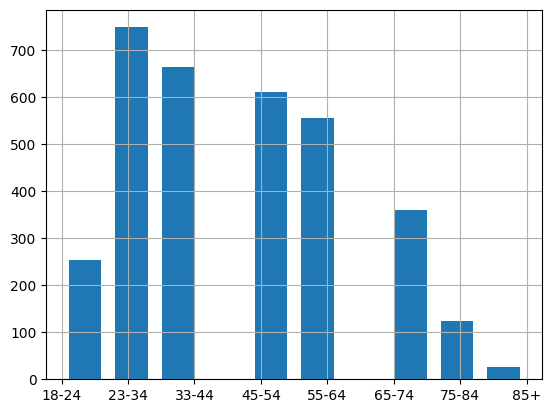

In [10]:
df['age'].hist(rwidth=0.7)

This lines up with the typical age distribution for cities nowadays, and verifies the claim that the survey was representative of the population. Below is the breakdown of population in age ranges for 2021 [(source)](https://www.statista.com/statistics/911456/new-york-population-share-age-group/). 

_Note that the graph shown  uses different age groups_

<img style='float:center' src='Report Images/NYC Age graph 2021.png'>

Next, we will explore the number of survey respondents in each zone of New York City.

In [11]:
df['cms_zone'].value_counts()

Northern Bronx        416
Staten Island         373
Outer Queens          361
Southern Bronx        346
Northern Manhattan    315
Inner Brooklyn        314
Outer Brooklyn        312
Middle Queens         310
Manhattan Core        301
Inner Queens          298
Name: cms_zone, dtype: int64

Like before, the majority of zones have more or less the same representation. Northern Bronx, Staten Island, Outer Queens and Southern Bronx stand out as having more representation than the rest outside a reasonable margin. We will have to keep this overrepresentation in mind.

### Stats per city zones
<a name='pt2.3'></a>

Next, having talked about the composition of our dataset, we will explore statistics regarding transport per city zones.

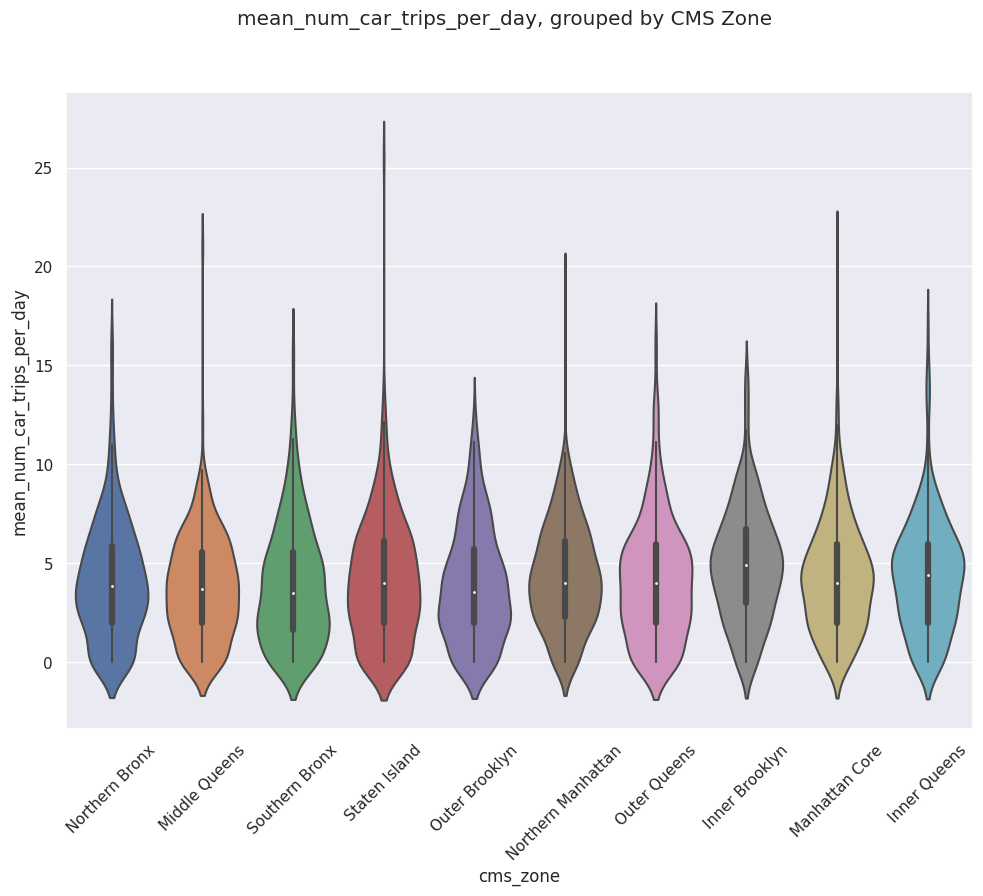

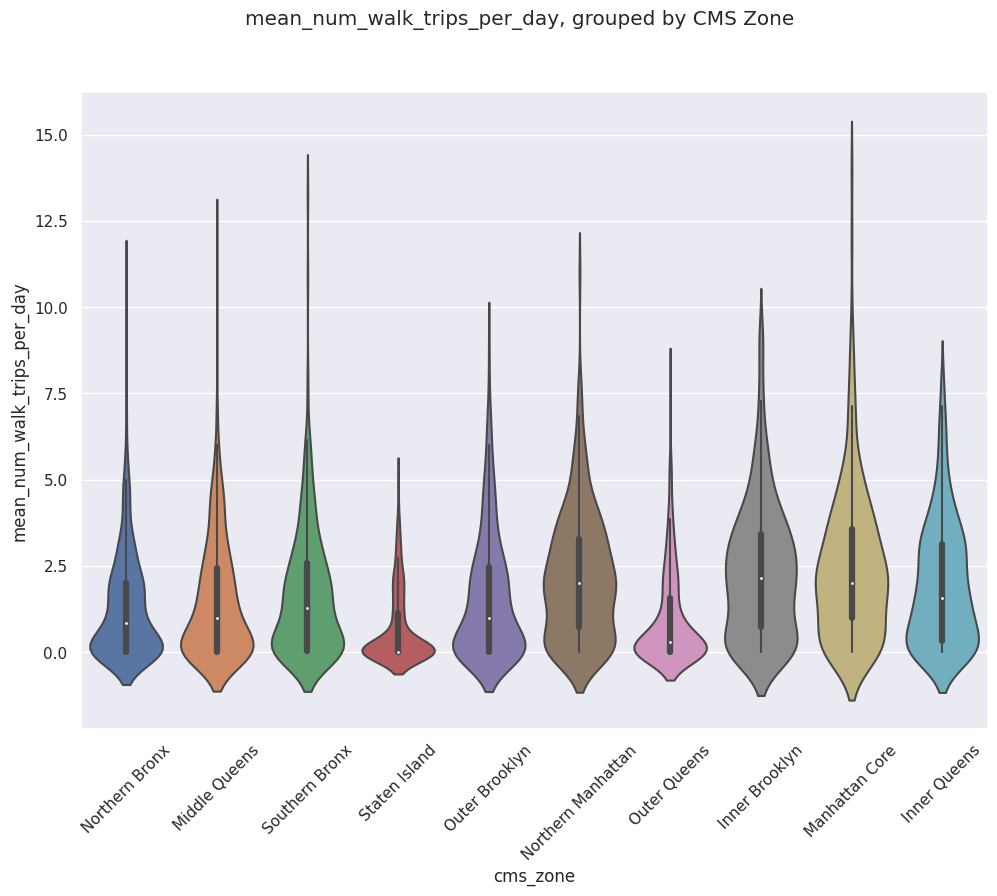

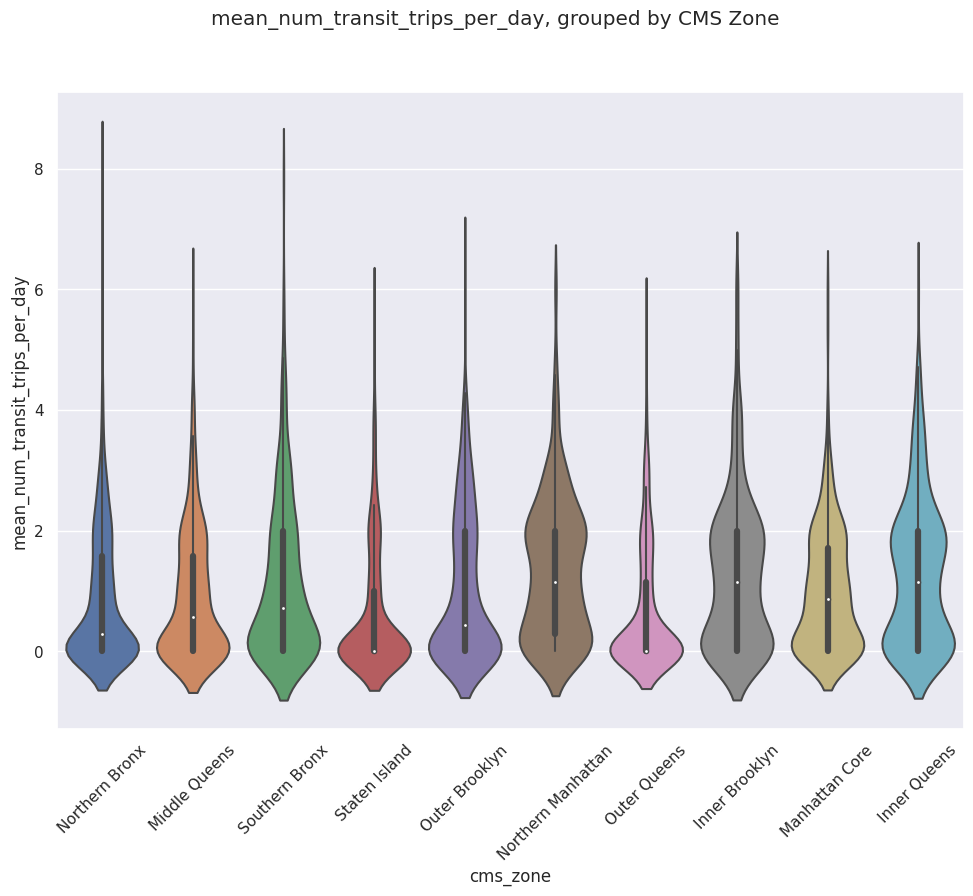

In [14]:
metrics = ['mean_num_car_trips_per_day', 'mean_num_walk_trips_per_day', 'mean_num_transit_trips_per_day']
sns.set(rc={'figure.figsize':(11.7,8.27)})

for m in metrics:
    
    plt.suptitle(f'{m}, grouped by CMS Zone')
    plt.xticks(rotation=45)
    
    sns.violinplot(x='cms_zone', y=m, data=df, scale='width')
    
    plt.show()

We can see that although the car usage is essentially the same across all city zones, walking and public transit are more popular in the more central areas of New York, namely Manhattan Core and Northern as well as the inner parts of Brooklyn and Queens. We verify that this is the case by looking at numerical data for `mean_num_walk_trips_per_day`.

In [17]:
df['mean_num_walk_trips_per_day'].describe()

count    3346.000000
mean        1.636239
std         1.814246
min         0.000000
25%         0.000000
50%         1.142857
75%         2.714286
max        14.000000
Name: mean_num_walk_trips_per_day, dtype: float64

In [18]:
df.groupby('cms_zone')['mean_num_walk_trips_per_day'].describe()

,count,mean,std,min,25%,50%,75%,max
cms_zone,,,,,,,,
Inner Brooklyn,314.0,2.343949,1.987669,0.0,0.714286,2.142857,3.428571,9.285714
Inner Queens,298.0,1.999521,1.829558,0.0,0.321429,1.571429,3.142857,7.857143
Manhattan Core,301.0,2.484101,2.180643,0.0,1.000000,2.000000,3.571429,14.000000
Middle Queens,310.0,1.533180,1.783189,0.0,0.000000,1.000000,2.428571,12.000000
Northern Bronx,416.0,1.326236,1.572923,0.0,0.000000,0.857143,2.000000,11.000000
Northern Manhattan,315.0,2.192744,1.839766,0.0,0.714286,2.000000,3.285714,11.000000
Outer Brooklyn,312.0,1.619048,1.806096,0.0,0.000000,1.000000,2.464286,9.000000
Outer Queens,361.0,0.946973,1.320265,0.0,0.000000,0.285714,1.571429,8.000000
Southern Bronx,346.0,1.682907,1.834490,0.0,0.035714,1.285714,2.571429,13.285714


Here we in fact see that means are not the same across city zones, which leads us to believe there might be a difference in means depending on zone or that the two attributes might be correlated.